In [15]:
import arviz as az
import matplotlib.pyplot as plt

import xarray

from chap_pymc.util import TARGET_DIR

i = 7
bn = 'viet_7'
az.rcParams['data.load'] = 'eager'

idata: az.InferenceData = az.from_netcdf(TARGET_DIR/ (f'viet_regression_{i}idata.nc'))
filename = TARGET_DIR / f'viet_regression_{i}_ds.nc'
print(filename)
ds= xarray.open_dataset(
    filename,
    engine='h5netcdf')
#idata.posterior['A'].isel(harmonic=0).median(dim=['chain', 'draw']).plot()
# load xarray from netcdf

#y = xarray.open_dataarray(f'y_{bn}.nc')
#X = xarray.open_dataarray(f'X_{bn}.nc')

/Users/knutdr/Sources/chap_pymc/target/viet_regression_7_ds.nc


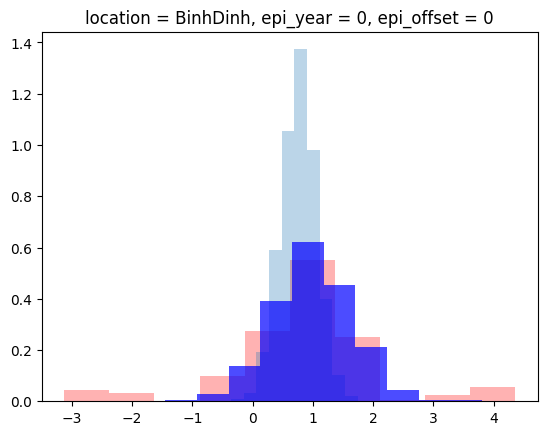

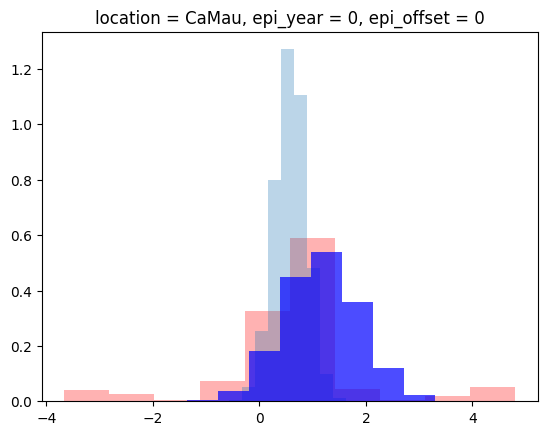

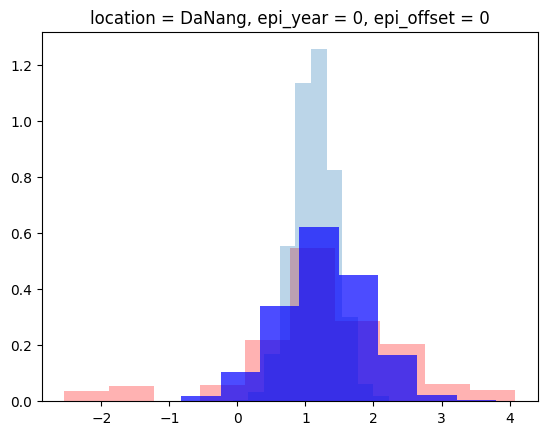

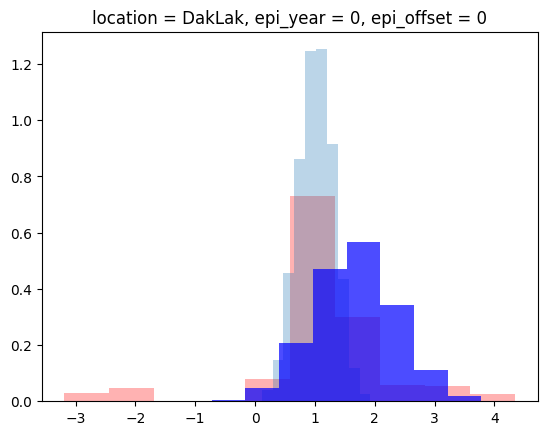

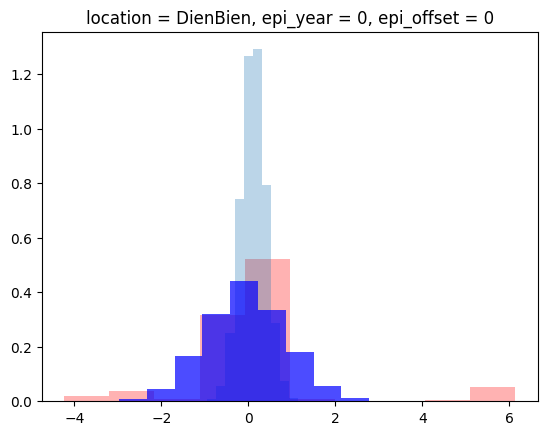

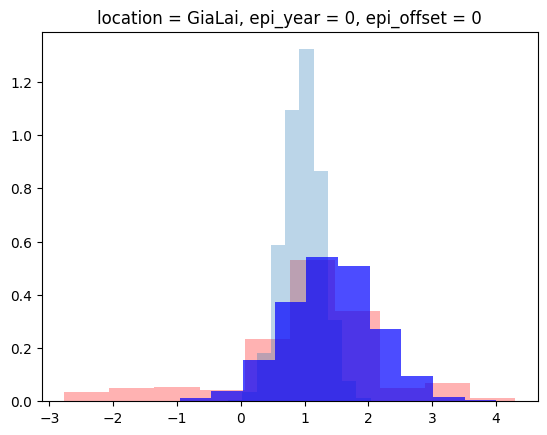

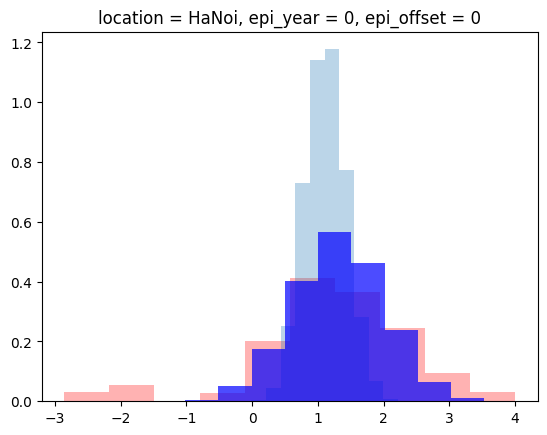

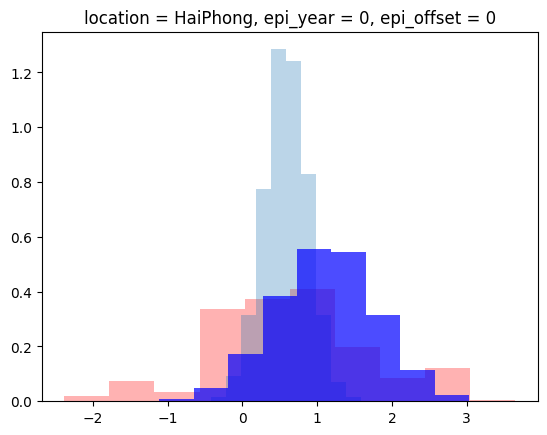

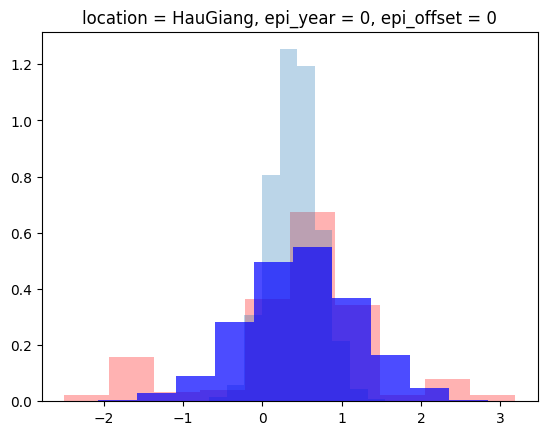

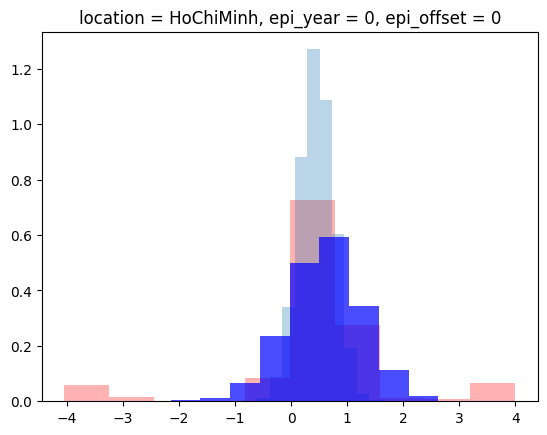

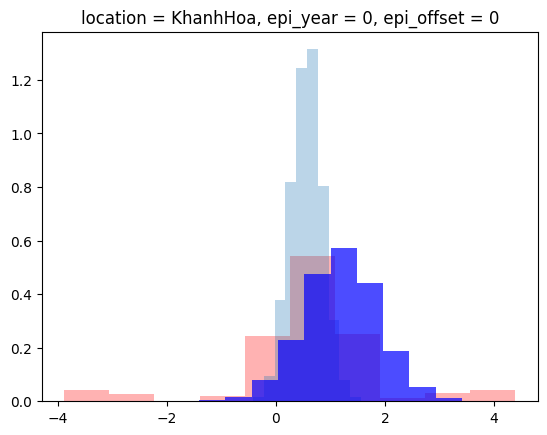

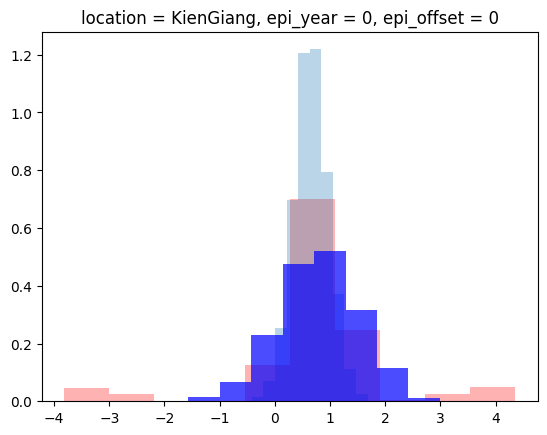

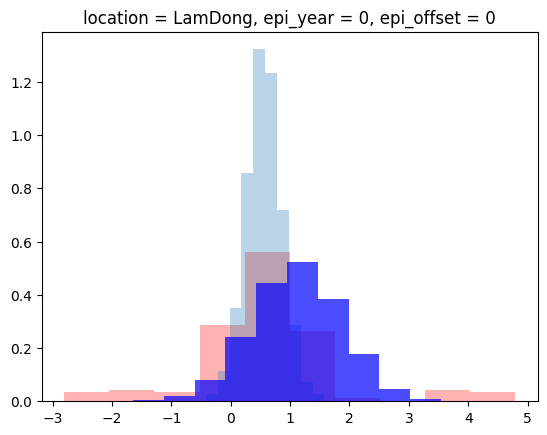

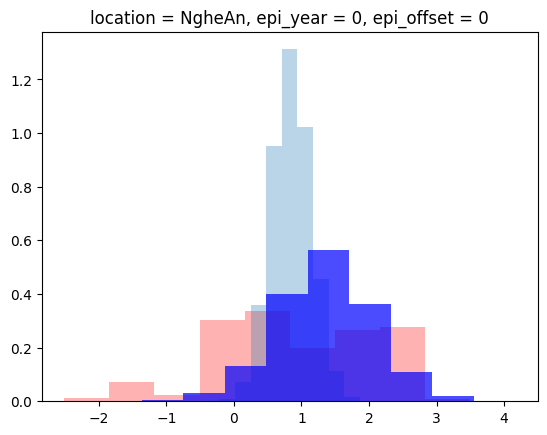

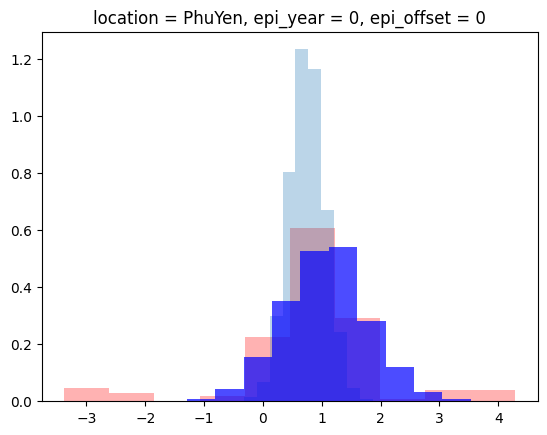

In [18]:
import matplotlib.pyplot as plt
prev_year = ds['prev_year_y']
diff = prev_year-idata.posterior['last_mu'].sel(epi_offset=0)
offset_loc = idata.posterior['offset_loc']
last_diff = prev_year.isel(epi_year=-1)-idata.posterior['last_mu'].sel(epi_offset=0).isel(epi_year=-1)
#print(last_diff)
for location in ds.coords['location'][:15]:
    diff.sel(location=location).plot.hist(density=True, alpha=0.3, color='r')
    offset_loc.sel(location=location).plot.hist(density=True,alpha=0.3)
    last_diff.sel(location=location).plot.hist(density=True, alpha=0.7, color='b')
    plt.show()
